In [39]:
library(ggplot2)
suppressPackageStartupMessages(library(extraDistr))
suppressPackageStartupMessages(library(distr))
source("./simple.R")
source("./simple_utils.R")
set.seed(2024)
K = 20

### Q2

In [40]:
# 1
posterior_distribution = function(rho, n_successes, n_observations) {
  K = length(rho) - 1
  gamma = rho * dbinom(n_successes, n_observations, (0:K)/K)
  normalizing_constant = sum(gamma)
  gamma/normalizing_constant
}

In [41]:
# 2
posterior_mean = function(post_dist) {
    return (sum((seq(0, K, 1)/K) * post_dist))
}

In [42]:
# 3
simulate_posterior_mean_error = function(rho_true, rho_prior, n_observations){
    dist_p = DiscreteDistribution(supp = (1/K)*(0:K), prob = rho_true/sum(rho_true))
    p_true = simulate(dist_p)
    Y = rep(simulate(Bern(p_true)), n_observations)
    post_dist = posterior_distribution(rho_prior, sum(Y), n_observations)
    post_mean = posterior_mean(post_dist)
    return (abs(p_true - post_mean))
}

In [43]:
# 4
rho_true = rho_prior = 1:(K+1)
n_obs_vector <- 2^(0:6)
experiment_results = data.frame()
for (n_obs in n_obs_vector) {
    errors = rep(simulate_posterior_mean_error(rho_true, rho_prior, n_obs), 1000)
    df = data.frame(n_observations=rep(n_obs, 1000), replication=(1:1000), errors=errors)
    experiment_results = rbind(experiment_results, df)
}
head(experiment_results)
tail(experiment_results)


,n_observations,replication,errors
,<dbl>,<int>,<dbl>
1,1,1,0.075
2,1,2,0.075
3,1,3,0.075
4,1,4,0.075
5,1,5,0.075
6,1,6,0.075


,n_observations,replication,errors
,<dbl>,<int>,<dbl>
6995,64,995,0.4481699
6996,64,996,0.4481699
6997,64,997,0.4481699
6998,64,998,0.4481699
6999,64,999,0.4481699
7000,64,1000,0.4481699


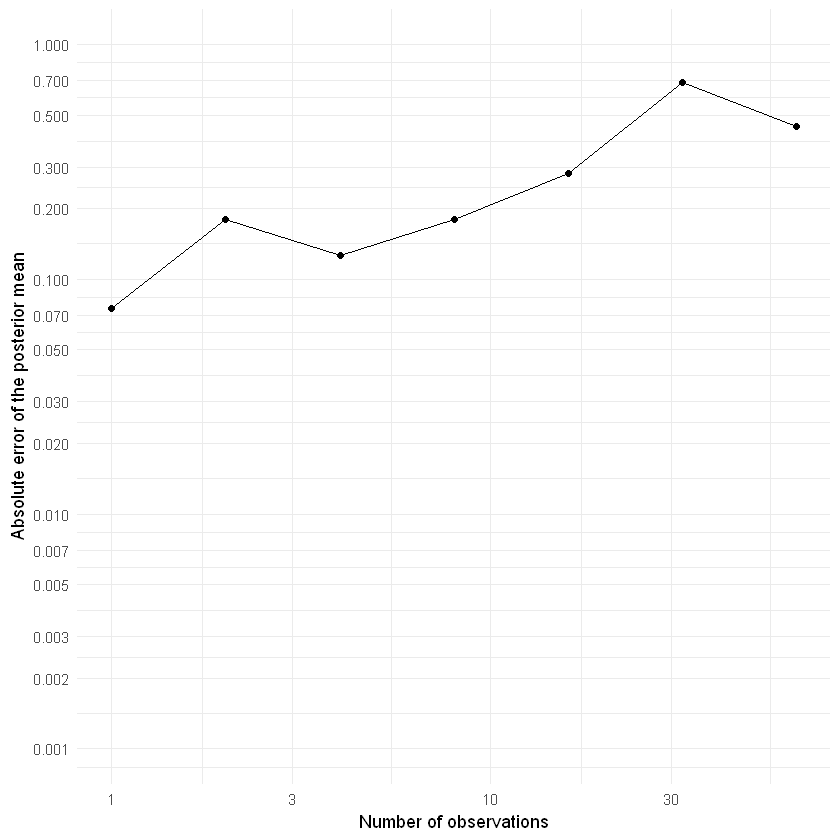

In [44]:
# 5
ggplot(experiment_results, aes(x=n_observations, y=errors+1e-9)) + # avoid log(0)
  stat_summary(fun = mean, geom="line") + # Line averages over 1000 replicates
  scale_x_log10() +  # Show result in log-log scale
  scale_y_log10(n.breaks=16) +
  coord_cartesian(ylim = c(1e-3, 1)) +
  theme_minimal() +
  geom_point() +
  labs(x = "Number of observations",
       y = "Absolute error of the posterior mean")

In [50]:
mean(experiment_results[experiment_results$n_observations==2^4, ]$errors)

[1] 0.2831076

In [49]:
# 6
y7 = mean(experiment_results[experiment_results$n_observations == 2^6, ]$errors)
y5 = mean(experiment_results[experiment_results$n_observations==2^4, ]$errors)
(log10(y7) - log10(y5)) / (log10(2^6) - log10(2^4))


[1] 0.3313474

In [45]:
# 7  
rho_true = 1:(K+1)
rho_prior = rep(1, K + 1)
new_results = data.frame()
for (n_obs in n_obs_vector) {
    errors = rep(simulate_posterior_mean_error(rho_true, rho_prior, n_obs), 1000)
    df = data.frame(n_observations = rep(n_obs, 1000), replication = (1:1000), errors = errors)
    new_results = rbind(new_results, df)
}

new_results$prior_type = rep("Different", 1000*length(n_obs_vector))

experiment_results$prior_type = rep("Match", 1000 * length(n_obs_vector))

all_results = rbind(experiment_results, new_results)

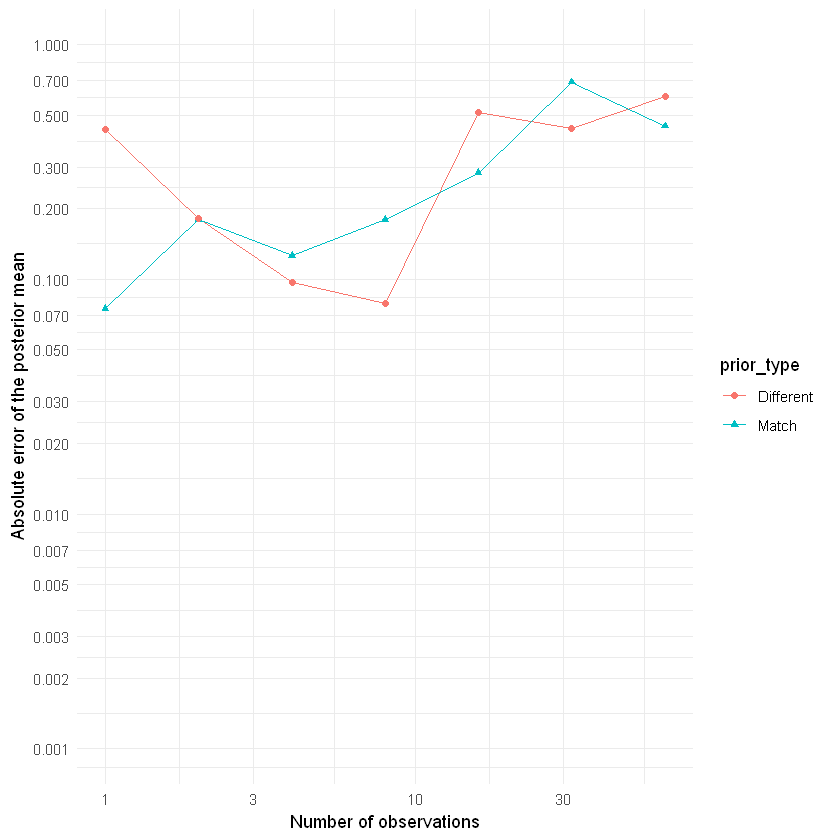

In [46]:
ggplot(all_results, aes(x=n_observations, y=errors+1e-9, # avoid log(0) 
                        color=prior_type, shape=prior_type)) + 
  stat_summary(fun = mean, geom="line") + # Line averages over 1000 replicates
  scale_x_log10() +  # Show result in log-log scale
  scale_y_log10(n.breaks=16) +
  coord_cartesian(ylim = c(1e-3, 1)) +
  theme_minimal() +
  geom_point() +
  labs(x = "Number of observations",
       y = "Absolute error of the posterior mean")